# HW3-2: 2D SVM with streamlit deployment (3D plot) - The dataset is distributed in a circular shape on the feature plane.

- The code in this notebook was generated using [GitHub Copilot](https://github.com/features/copilot).

## Prompt
Generate a Python script that follows the CRISP-DM process to classify a dataset using Support Vector Machine (SVM). The task is to generate 600 random 2D points centered at the coordinates (0,0) with a variance of 10. Each point should be assigned a label: Y=0 for points within a distance of 4 from the origin, and Y=1 for points further than 4. Additionally, generate a third feature x3 using a Gaussian function applied to x1 and x2 for a 3D plot, and display the SVM hyperplane during evaluation.

1. Business Understanding: 
    - The goal is to classify points in a 3D space using SVM based on their distance from the origin in 2D. Points within a specified radius should belong to class Y=0, and points outside this radius should belong to class Y=1.
    - The task will demonstrate how SVM can separate linearly separable data in a higher-dimensional feature space.
    - The model's performance will be evaluated based on accuracy, confusion matrix, and visualized hyperplane.
2. Data Understanding: 
    - Generate 600 random points in 2D space, where each point’s x1 and x2 are sampled from a normal distribution with a variance of 10, centered at (0,0).
    - For each point, calculate the Euclidean distance from the origin (0,0). Assign the label Y=0 for points with a distance less than a variable threshold distance_threshold (default: 4), and Y=1 for points with a distance greater than or equal to this threshold.
    - Define variables for the variance and distance threshold to allow easy adjustment of these parameters in the future.
    - Generate a third feature x3 for each point using a Gaussian function applied to x1 and x2.
    - Create a 2D and a 3D scatter plot where the x and y axes represent x1 and x2, and the z axis represents x3. Color the points based on the class label Y to visualize the distribution of classes.
    - Create a 3D scatter plot with x1, x2, and x3 on the axes, and color the points by their class label Y to visualize the distribution of the classes in 3D. 
3. Data Preparation: 
    - Split the dataset into training and testing sets using an 80-20 split.
    - Print the shape of the training and test sets to verify the split.
4. Modeling: 
    - Create and train an SVM model.
5. Evaluation:
    - Use the trained model to make predictions on the test data.
    - Calculate and print the accuracy score of the model.
    - Generate a confusion matrix to assess classification performance and display it visually.
    - Display a 3D scatter plot of the test data. Use x1, x2, and x3 as the axes, and color the points according to their true class labels (Y). Also, display the SVM hyperplane in the 3D plot to visualize the decision boundary.
    - Display a 3D scatter plot of the entire dataset (including both training and test data). Use the same x1, x2, and x3 axes, and color the points according to their true class labels (Y). Also, display the SVM hyperplane in the 3D plot to visualize the decision boundary.
6. Deployment:
    - Deploy the SVM model using Streamlit.
    - Allow the user to adjust the distance threshold and variance of the dataset using sliders.
    - Update the 2D and 3D scatter plots based on the user's input.

## Modify
- fix zz calculation error
- add 3D scatter plot for the entire dataset
- add the distance threshold slider

## Result

### Step 1: Business Understanding
- The goal is to classify points in a 3D space based on their distance from the origin in 2D, using SVM. Points inside a radius of 4 are labeled as Y=0, while points outside this radius are labeled as Y=1.

### Step 2: Data Understanding
- 600 random points are generated with x1 and x2 values sampled from a normal distribution.
- Each point's distance from the origin is computed and used to assign a label (Y=0 or Y=1).
- A third feature x3 is derived using a Gaussian function based on x1 and x2.
- 2D and 3D scatter plots are generated to visualize the dataset.

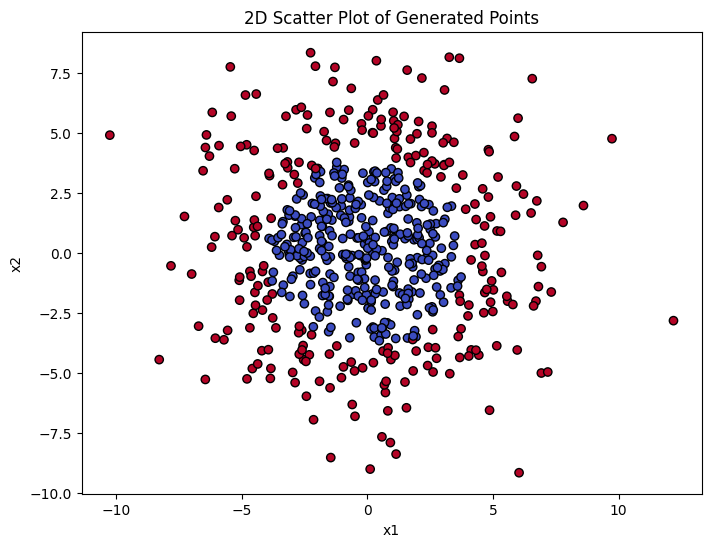

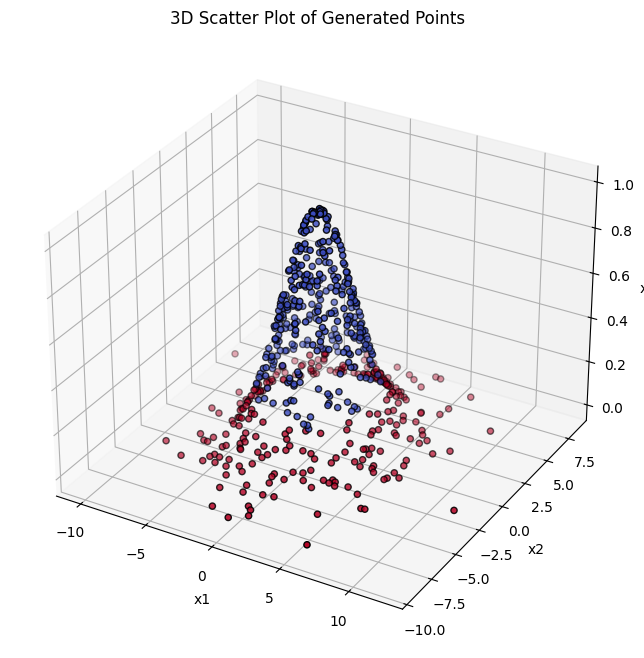

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Data Understanding
# Generate 600 random points in 2D space
np.random.seed(42)
n_points = 600
variance = 10
distance_threshold = 4

x1 = np.random.normal(0, np.sqrt(variance), n_points)
x2 = np.random.normal(0, np.sqrt(variance), n_points)
distances = np.sqrt(x1**2 + x2**2)
y = (distances >= distance_threshold)

# Generate the third feature x3 using a Gaussian function applied to x1 and x2
x3 = np.exp(-0.1 * (x1**2 + x2**2))

# Create a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Scatter Plot of Generated Points')
plt.show()

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=y, cmap='coolwarm', edgecolors='k')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('3D Scatter Plot of Generated Points')
plt.show()

### Step3: Data Preparation
- The dataset is split into training and testing sets (80-20 split).
- The size of the training and test sets is printed.

In [74]:
# Combine features into a single dataset
X = np.column_stack((x1, x2, x3))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (480, 3)
Test set shape: (120, 3)


### Step 4: Modeling
- An SVM classifier with a linear kernel is created and trained on the training dataset.

In [75]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

### Step 5: Evaluation
- The trained model is evaluated on the test dataset.
- Accuracy and confusion matrix are calculated and visualized.
- 3D scatter plots are generated to visualize the test data and the decision boundary.
- A 3D plot is also made for the entire dataset, including both training and testing points, with the decision boundary visualized.

Accuracy: 0.99


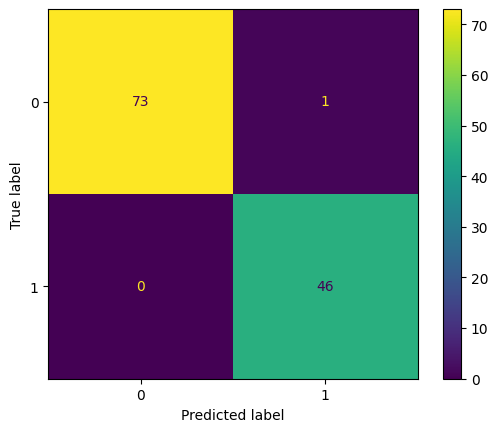

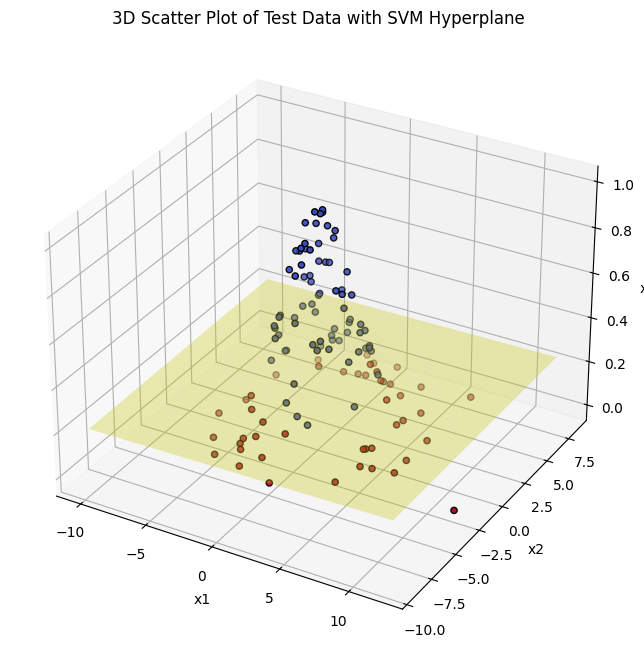

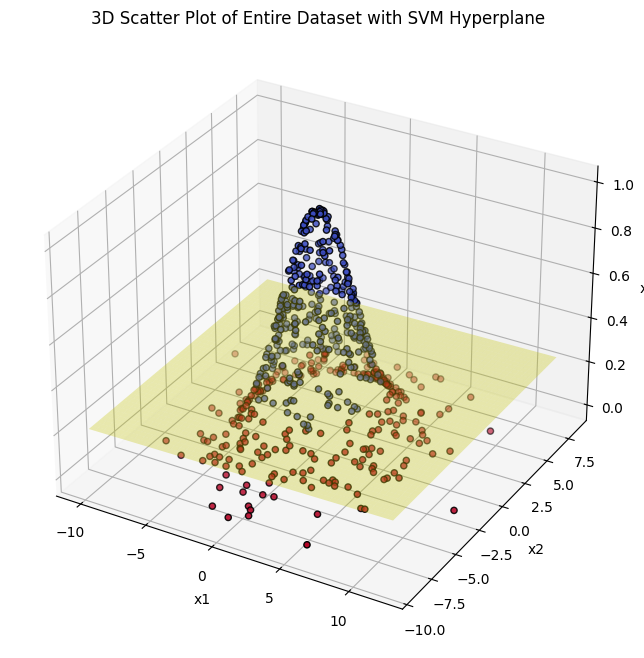

In [76]:
# Use the trained model to make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate and print the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a confusion matrix to assess classification performance
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Display a 3D scatter plot of the test data with the SVM hyperplane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='coolwarm', edgecolors='k')

# Create a mesh grid for the hyperplane
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 50))
zz = (-svm_model.coef_[0][0] * xx - svm_model.coef_[0][1] * yy - svm_model.intercept_[0]) / svm_model.coef_[0][2]
ax.plot_surface(xx, yy, zz, alpha=0.3, color='yellow')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('3D Scatter Plot of Test Data with SVM Hyperplane')
plt.show()

# Display a 3D scatter plot of the entire dataset with the SVM hyperplane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', edgecolors='k')

# Plot the hyperplane
ax.plot_surface(xx, yy, zz, alpha=0.3, color='yellow')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('3D Scatter Plot of Entire Dataset with SVM Hyperplane')
plt.show()

### Step 6: Deployment
- Successfully deployed the SVM model using Streamlit.

#### Notice
Since it's necessary to launch a Streamlit server, I placed the code in [`app.py`](./app.py).

#### Please follow the steps below to start the Streamlit server:
1. Navigate to the directory where [`app.py`](./app.py) is located:

   ```bash
   cd {/path/to/app.py}
   ```
2. Start the Flask server:

    ```bash
    streamlit run app.py
    ```
3. Open the web page at: http://localhost:8501
    - Streamlit will just increment the port number to 8502, 8503, etc. if 8501 is in-use.